<a href="https://colab.research.google.com/github/puneetarora30/NeuralNetworks/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


In [3]:
#dataset
a = [0,0,1,1,0,0,
     0,1,0,0,1,0,
     1,1,1,1,1,1,
     1,0,0,0,0,1,
     1,0,0,0,0,1]

b= [0,1,1,1,1,0,
    0,1,0,0,1,0,
    0,1,1,1,1,0,
    0,1,0,0,1,0,
    0,1,1,1,1,0]

c = [0,1,1,1,1,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,1,1,1,0]

In [4]:
#creating labels
y = [[1,0,0],
     [0,1,0],
     [0,0,1]]


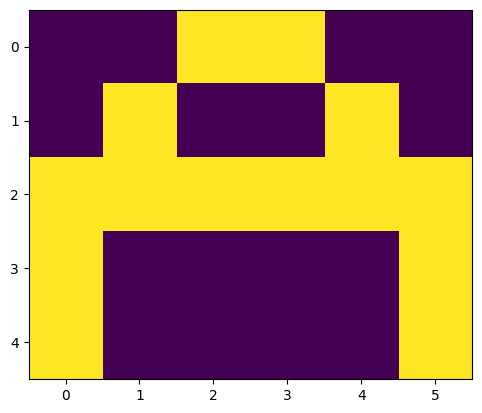

In [5]:
#visualize the data
plt.imshow(np.array(a).reshape(5,6))
plt.show()

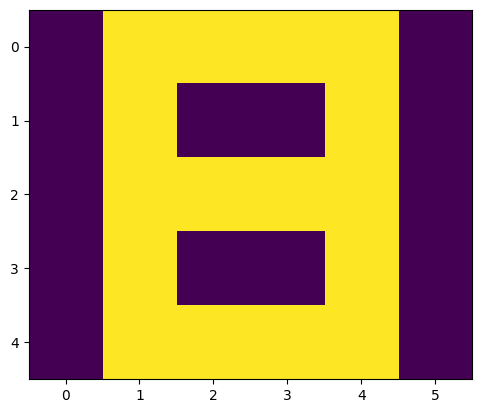

In [6]:
#visualize the data
plt.imshow(np.array(b).reshape(5,6))
plt.show()

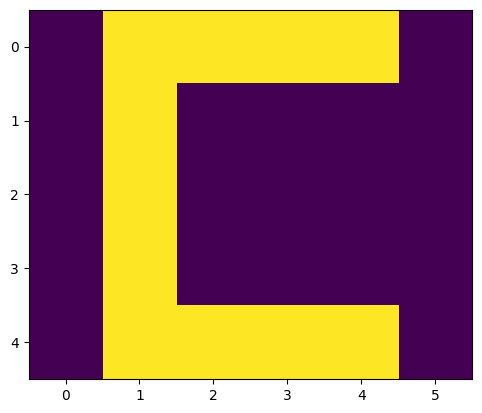

In [7]:
#visualize the data
plt.imshow(np.array(c).reshape(5,6))
plt.show()

In [8]:
#convert data and labels into numpy array
x = [np.array(a).reshape(1,30), np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y = np.array(y)
print (x, "\n \n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 
 
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [9]:
# input (1,30)
# hidden (1,5)
#output (3,3)

In [10]:
#activation function

def sigmoid(x):
  return (1/(1+np.exp(-x)))



In [11]:
#creating feed foward NN
def f_forward(x, w1, w2):
  #hidden layer
  z1 = x.dot(w1)
  a1 = sigmoid(z1)

  #output layer
  z2 = a1.dot(w2)
  a2 = sigmoid(z2)
  return(a2)

In [12]:
#initialize the weights
def generate_wt(x,y):
  l = []
  for i in range(x*y):
    l.append(np.random.randn())
  return(np.array(l).reshape(x,y))

In [24]:
# for loss
def loss_function(out,Y):
  s = (np.square(out-Y))
  s = np.sum(s)/len(y)
  return(s)

In [27]:
#create back propagation of error
def back_prop(x,y,w1,w2,alpha):

  #hidden
  z1= x.dot(w1)
  a1= sigmoid(z1)

  #output layer
  z2 = a1.dot(w2)
  a2= sigmoid(z2)

  #for every error occured in output layer
  d2= (a2-y)
  d1= np.multiply((w2.dot((d2.transpose()))).transpose(),np.multiply(a1,1-a1))
  #gradiant
  w1_adj = x.transpose().dot(d1)
  w2_adj = a1.transpose().dot(d2)

  w1= w1 -(alpha*(w1_adj))
  w2= w2 -(alpha*(w2_adj))

  return (w1,w2)

In [22]:
def train(x,Y,w1,w2,alpha=0.01, epoch = 10):
  acc = []
  loss = []
  for j in range(epoch):
      l= []
      for i in range(len(x)):
          out = f_forward(x[i],w1,w2)
          l.append(loss_function(out,Y[i]))
          w1,w2 = back_prop(x[i], y[i], w1, w2, alpha)
          print("Epochs:", j+1,"acc:", (1-(sum(l)/len(x)))*100)
          acc.append((1-(sum(l)/len(x)))*100)
          loss.append(sum(l)/len(x))
  return(acc,loss,w1,w2)

In [17]:
def predict(x,w1,w2):
    Out = f_forward(x,w1,w2)
    maxm=0
    k=0
    for i in range (len(Out[0])):
      if (maxm<Out[0][i]):
        mam = Out[0][i]
        k = i
      if (k==0):
        print("Image is of letter A")
      elif (k==1):
        print("Image is of letter B")
      else:
        print("Image is of letter C")
      plt.imshow(x.reshape(5,6))
      plt.show()

In [18]:
w1 = generate_wt(30,5)
w2 = generate_wt(5,3)
print(w1,"\n", w2)

[[-0.05025896  0.75878857  1.45355557 -0.24679555 -1.33728025]
 [ 0.66514182 -0.6361719  -1.06200524 -0.05359211 -1.42117735]
 [-0.10982746 -2.56998987  1.05539533  0.40170191  1.18068876]
 [ 1.75013766  0.17247097 -0.29700925  0.96936187  1.05849867]
 [ 0.0970271  -1.48633991 -0.48200764 -1.10923606  0.43054467]
 [-0.26122281 -1.68480495 -0.25309325 -0.8691426   1.5009103 ]
 [-0.58254676 -0.08457126 -1.81159042 -0.32353091 -0.17828618]
 [ 0.04834149 -0.15076219  0.94900096  1.25323125  0.50822907]
 [-0.27833728 -0.16383044 -0.60191067  0.07705171 -2.07850669]
 [-0.17349803 -0.26245411 -0.44497258 -0.49433921  1.66027229]
 [-1.79970644  0.01305143  0.74924807  0.30755886 -0.39990703]
 [ 0.19014573 -1.40336228  0.80371789  1.34589525 -0.53975976]
 [-0.22246647 -0.82682804 -0.81511261  0.69618897 -0.85942301]
 [ 1.49301105  1.42887991  0.82703729 -0.06993623 -1.61225897]
 [-0.21111928 -0.36809423  0.20916317  1.51309327 -1.30936598]
 [-0.81066251  1.69537778  2.14336013  0.29404873  0.43

In [28]:
acc, loss, w1, w2 = train(x,y,w1,w2,0.1,100)

Epochs: 1 acc: 85.63442281032698
Epochs: 1 acc: 82.07039231040724
Epochs: 1 acc: 62.57547498478324
Epochs: 2 acc: 86.06832004525769
Epochs: 2 acc: 82.34296217737833
Epochs: 2 acc: 66.50131030022428
Epochs: 3 acc: 87.12273805989602
Epochs: 3 acc: 83.09813371877303
Epochs: 3 acc: 70.28411343859493
Epochs: 4 acc: 88.7314369586279
Epochs: 4 acc: 84.35562877537257
Epochs: 4 acc: 73.65726862123074
Epochs: 5 acc: 90.30559749377571
Epochs: 5 acc: 85.6040460623215
Epochs: 5 acc: 76.37707174307678
Epochs: 6 acc: 91.44831979987138
Epochs: 6 acc: 86.47692951410791
Epochs: 6 acc: 78.31031908934592
Epochs: 7 acc: 92.20547358837386
Epochs: 7 acc: 87.03053161135048
Epochs: 7 acc: 79.6598444935703
Epochs: 8 acc: 92.70606492076087
Epochs: 8 acc: 87.3961258654925
Epochs: 8 acc: 80.64362131100647
Epochs: 9 acc: 93.04553146465818
Epochs: 9 acc: 87.66798922764704
Epochs: 9 acc: 81.40881208543743
Epochs: 10 acc: 93.28572071104489
Epochs: 10 acc: 87.9065752262295
Epochs: 10 acc: 82.04967443463327
Epochs: 11 a

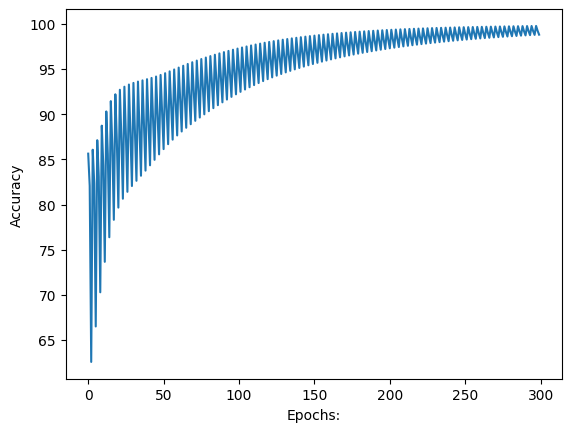

In [29]:
#plotting accuracy
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

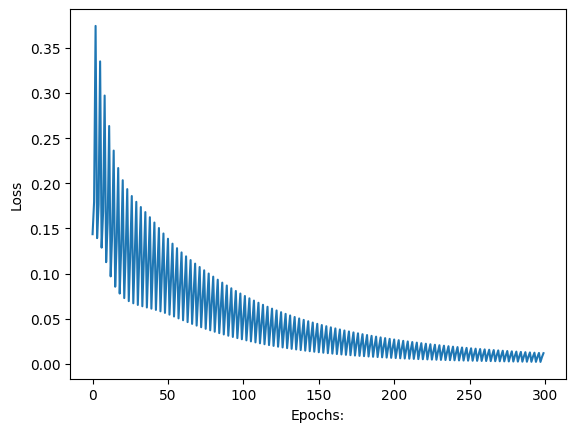

In [31]:
#plotting loss
plt.plot(loss)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

In [32]:
print(w1,"\n", w2)

[[-0.05025896  0.75878857  1.45355557 -0.24679555 -1.33728025]
 [ 0.36519342 -0.57428711 -1.36165779 -0.0095155  -0.88309731]
 [-0.04384498 -2.50308758  0.75074879  0.41293717  0.98766016]
 [ 1.81612014  0.23937326 -0.6016558   0.98059713  0.86547007]
 [-0.2029213  -1.42445513 -0.78166019 -1.06515944  0.96862471]
 [-0.26122281 -1.68480495 -0.25309325 -0.8691426   1.5009103 ]
 [-0.58254676 -0.08457126 -1.81159042 -0.32353091 -0.17828618]
 [ 0.11432397 -0.0838599   0.64435441  1.26446651  0.31520047]
 [-0.27833728 -0.16383044 -0.60191067  0.07705171 -2.07850669]
 [-0.17349803 -0.26245411 -0.44497258 -0.49433921  1.66027229]
 [-2.1906586   0.10173937  1.18310109  0.26951219 -0.4005558 ]
 [ 0.19014573 -1.40336228  0.80371789  1.34589525 -0.53975976]
 [ 0.14346441 -0.82181053 -0.82010661  0.66334761 -1.59053165]
 [ 1.55899353  1.49578221  0.52239074 -0.05870097 -1.80528757]
 [-0.60207144 -0.2794063   0.64301619  1.47504661 -1.31001475]
 [-1.20161467  1.78406571  2.57721315  0.25600207  0.42

Image is of letter A


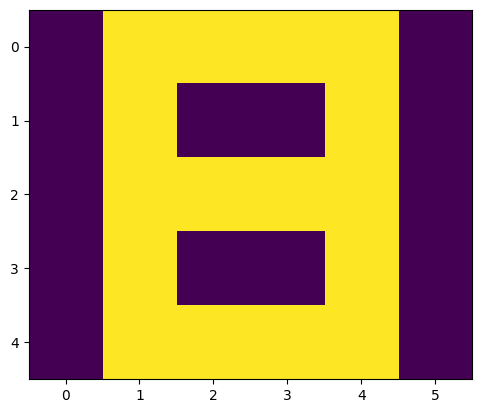

Image is of letter B


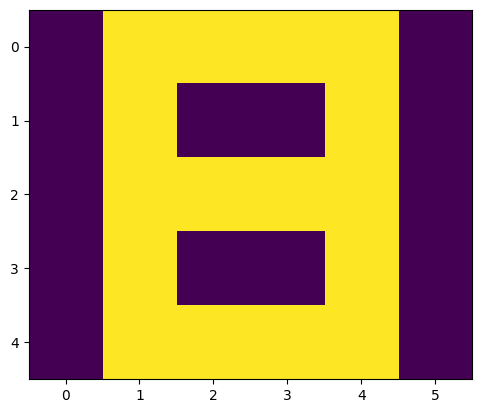

Image is of letter C


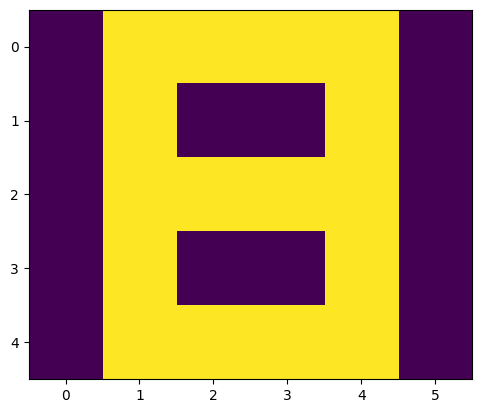

In [34]:
predict(x[1],w1,w2)